In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('credit_risk_dataset.csv')

In [3]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# EDA

In [4]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
data.isnull().sum()/len(data)*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

**There a large numbers of null values in 2 variabels, person employment length and loan interest rate. Then, those must be droped out of the data.**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Data Visualization

### Univariable explore

In [8]:
numbers = [i for i in data.columns if ((data[i].dtype!='object') and len(data[i].unique())>2)]
numbers

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

c:\program files\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

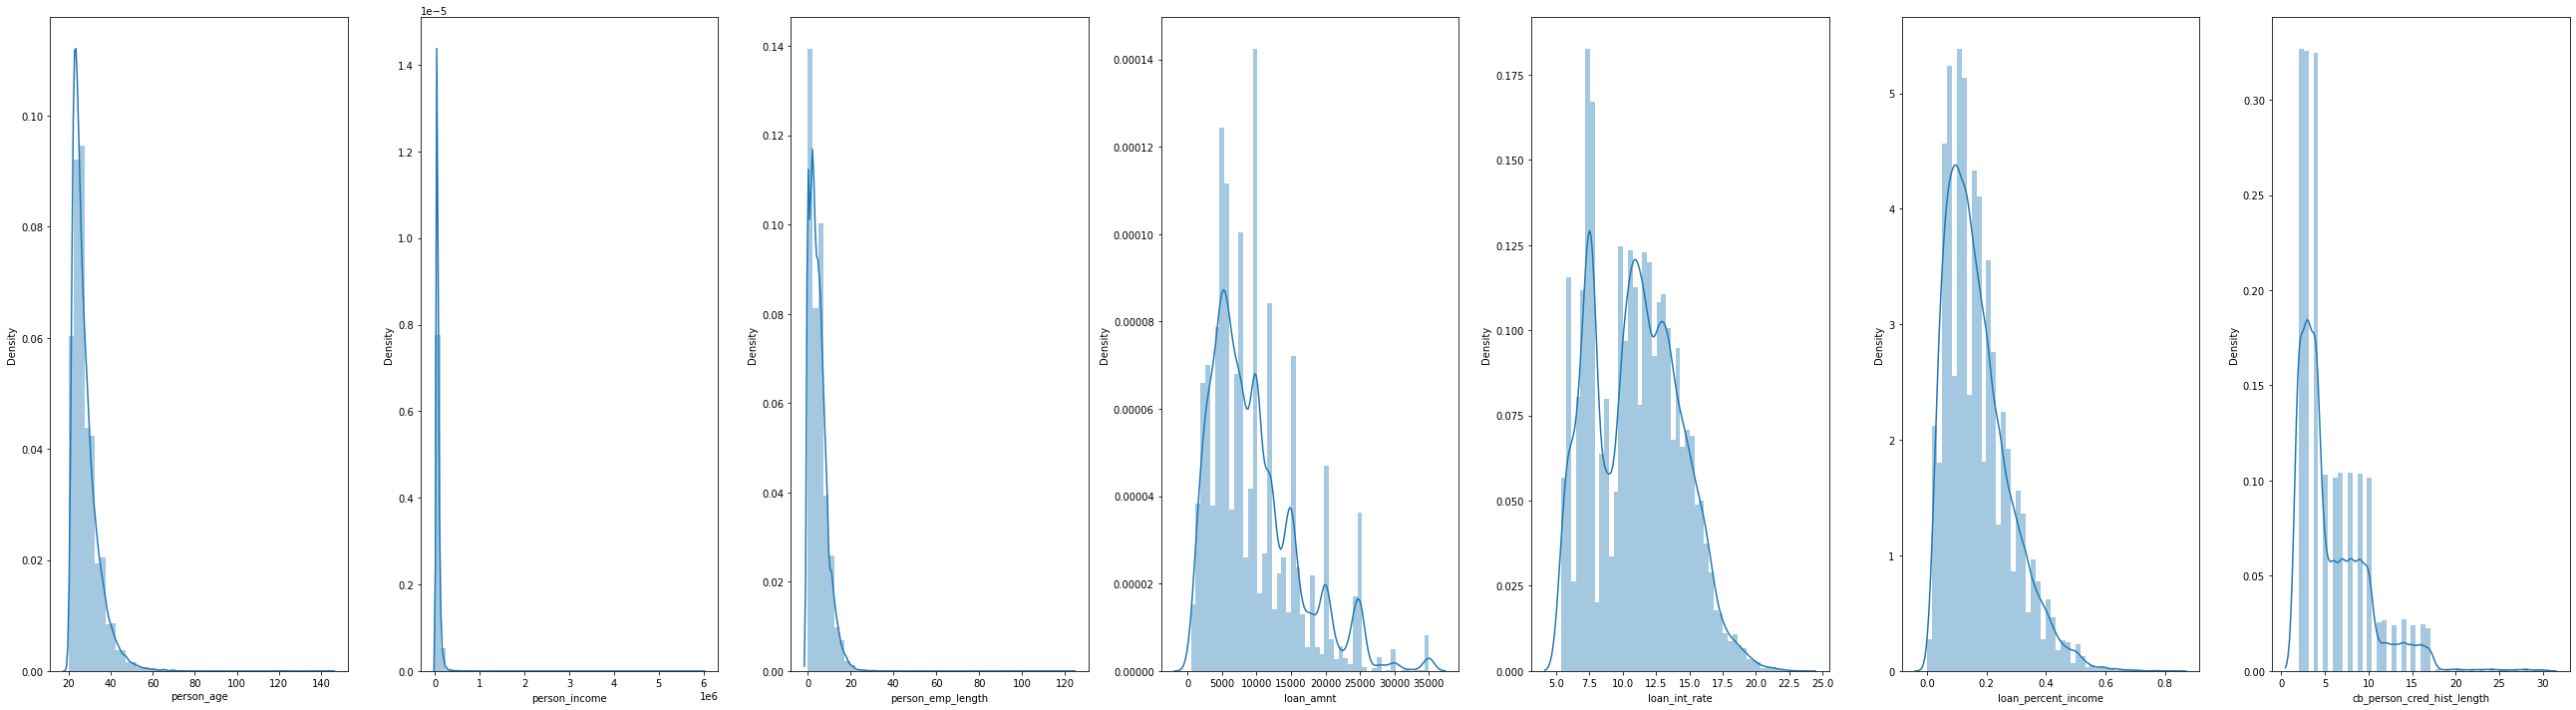

In [9]:
fig, axes = plt.subplots(1,len(numbers), figsize=(36,10))
for i in range(0,len(numbers)):
    sns.distplot(data[numbers[i]].dropna(), ax=axes[i])
plt.tight_layout()
plt.savefig('histogram.jpg', dpi=300)

**Except loan_in_rate, all of other 6 numeric variables distribution are positively skewed. So log transformation need perform before standardaization and modelling.**

In [10]:
categories = [i for i in data.columns if (data[i].dtype=='object' or len(data[i].unique())<=2)]
categories

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'loan_status',
 'cb_person_default_on_file']

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.
c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid p

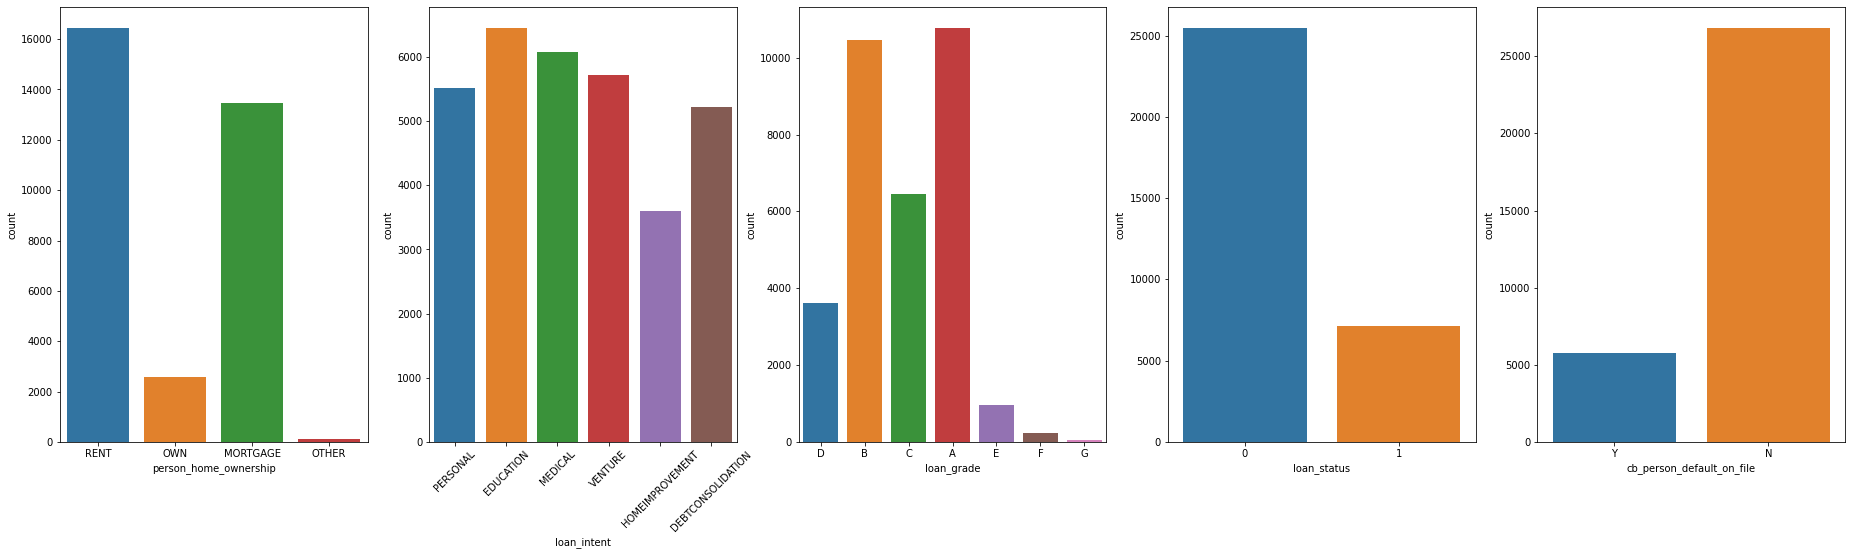

In [11]:
fig, axes = plt.subplots(1, len(categories), figsize=(32,8))
for i, v in enumerate(categories):
    sns.countplot(v, data=data, ax=axes[i])
    axes[1].set_xticklabels(data[categories[1]].unique(), rotation=45)

In [12]:
len(data[data.loan_grade=='A'])/len(data)

0.3307756054141985

In [13]:
len(data[data.loan_grade=='B'])/len(data)

0.32076977379454286

In [14]:
len(data[data.loan_grade=='C'])/len(data)

0.19821368282127622

In [15]:
(len(data[data.loan_grade=='A'])+len(data[data.loan_grade=='B'])+len(data[data.loan_grade=='C']))/len(data)

0.8497590620300175

In [16]:
len(data[data.loan_status==0])/len(data)

0.7818360394094718

**The figure describes frequency of characteristics of each variable. Most of clients rent houses or get their mortage to buy houses. There are wide range of loaning intention including loaning for education, medical, venture, debtconsolidation purpose or for personal, home improvement. Nearly 85% of contracts is grade from A to C. The percentage of A oand B grade of the quality score is more than 30%. This mean that the risk of default loan is low. Most of contract from history is not default. 78% of current contracts status is no default.**   

### Multivariable explore

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\program files\pytho

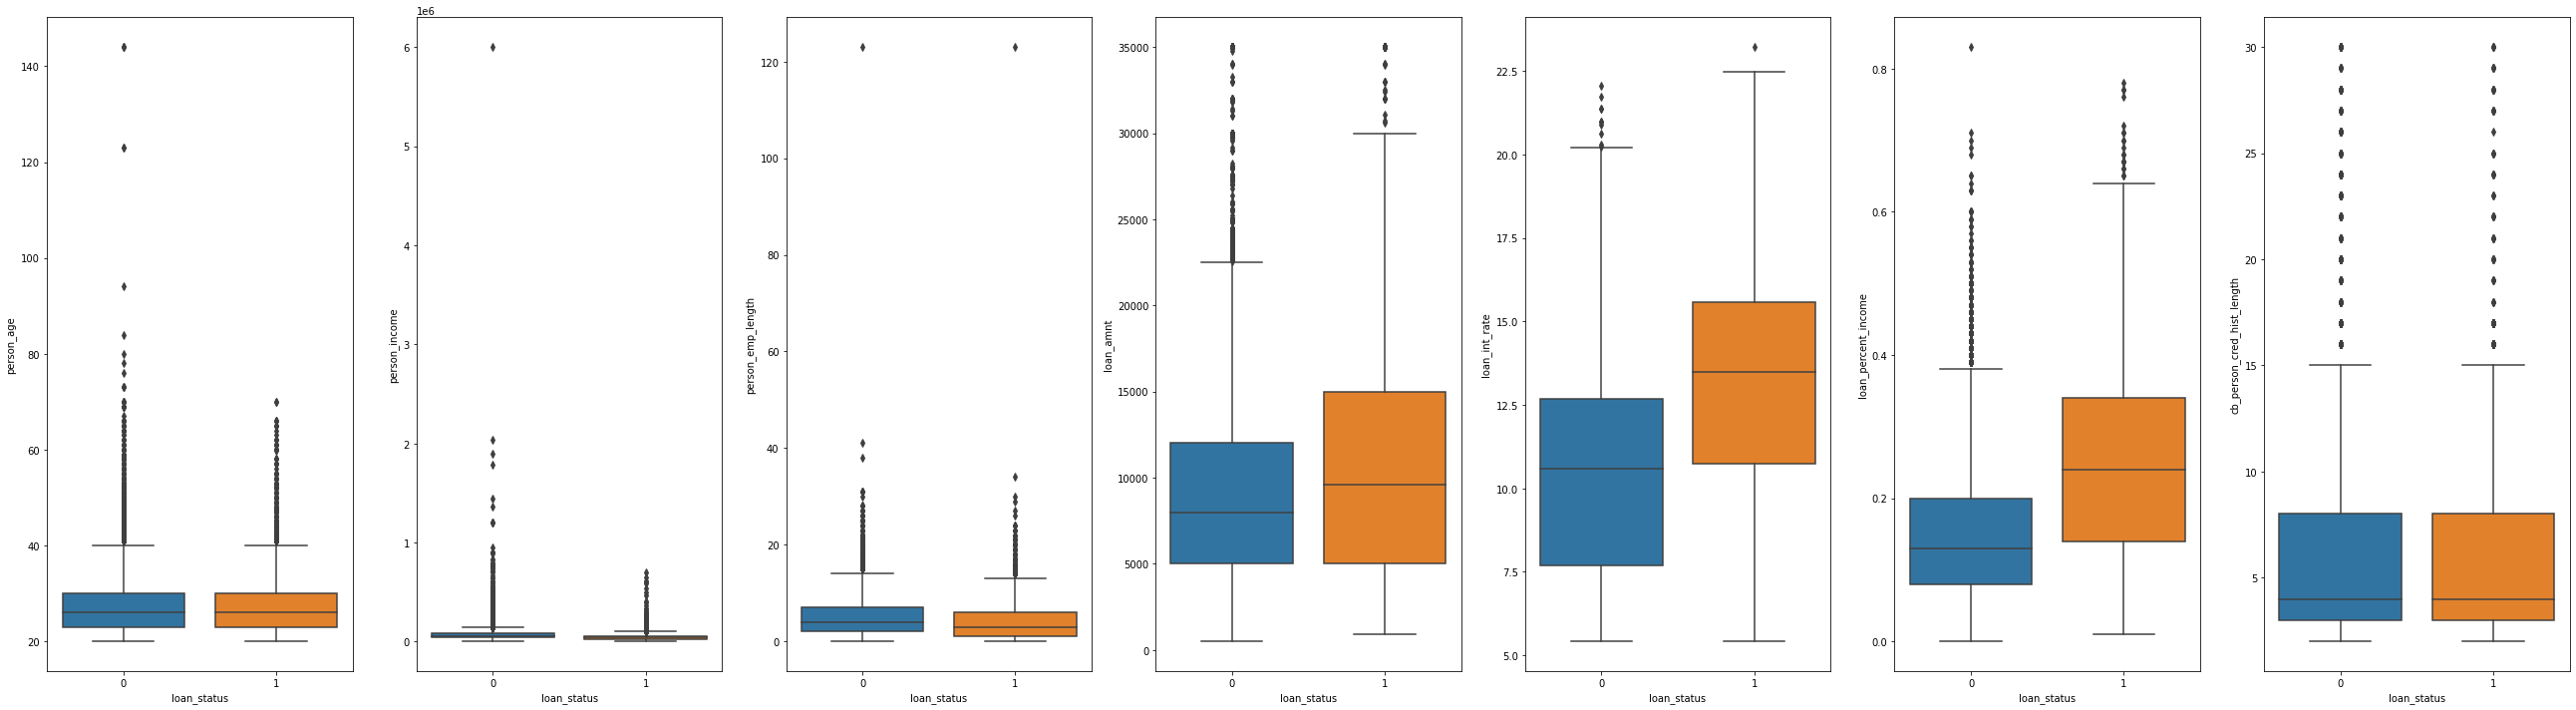

In [17]:
fig, axes = plt.subplots(1,len(numbers), figsize=(36,10))
for i in range(0,len(numbers)):
    sns.boxplot(data['loan_status'], data[numbers[i]].dropna(),  ax=axes[i])
plt.tight_layout()
plt.savefig('boxplot.jpg', dpi=300)

**Most of numeric variables have outliers because all of them is positively skewed distribution.**

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """
c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`,

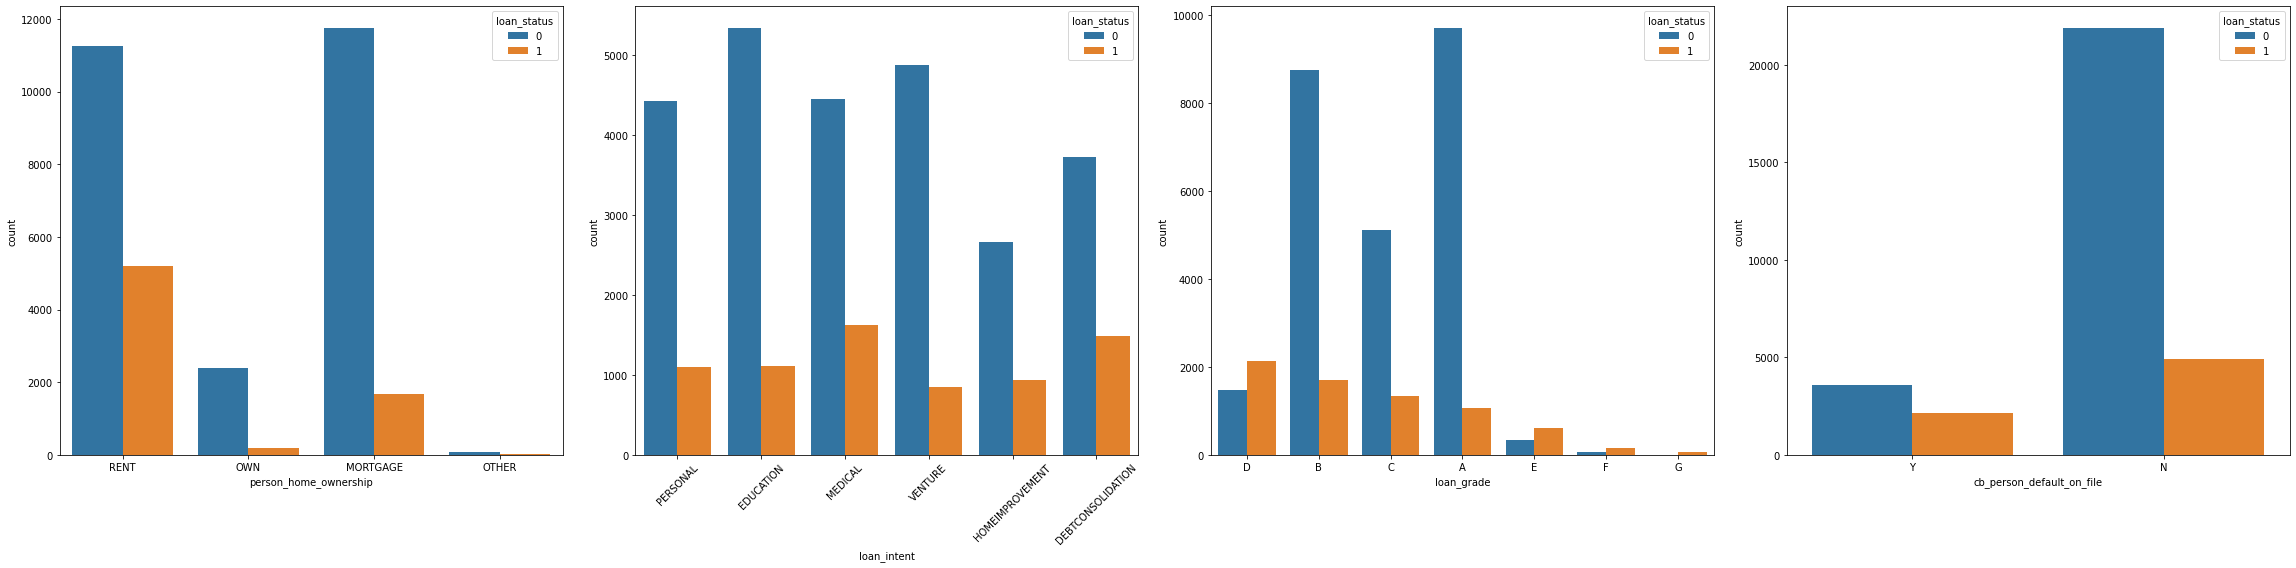

In [18]:
non_target = [i for i in categories if i !='loan_status']
fig, axes = plt.subplots(1, len(non_target), figsize=(32,8))
for i, v in enumerate(non_target):
    sns.countplot(v, data=data, ax=axes[i], hue='loan_status')
    axes[1].set_xticklabels(data[non_target[1]].unique(), rotation=45)
plt.tight_layout()
plt.savefig('cat_and_target.jpg', dpi=300)

**The figure shows that people renting their house or getting mortage for buying their house have default status. Loan default occurs regardless of loaning intention. The grade of D, E, F, G have high risk of failure to pay back a debt.**  

In [19]:
cross = pd.crosstab(data['loan_status'], data['cb_person_default_on_file'])
cross

cb_person_default_on_file,N,Y
loan_status,,
0,21900,3573
1,4936,2172


In [20]:
cross_pct = pd.crosstab(data['loan_status'], data['cb_person_default_on_file'],  normalize='index')
cross_pct

cb_person_default_on_file,N,Y
loan_status,,
0,0.859734,0.140266
1,0.694429,0.305571


In [21]:
list_N = [i for i in cross_pct.loc[0].sort_values(ascending=False)]
list_Y = [i for i in cross_pct.loc[1].sort_values(ascending=False)]


In [22]:
loc_N = list_N[0]/2
loc_N_1 = list_N[0]+ list_N[1]/2
loc_Y = list_Y[0]/2
loc_Y_1 = list_Y[0]+ list_Y[1]/2

In [23]:
loc = [loc_N_1, loc_N, loc_Y_1, loc_Y]
loc

[0.9298669179130845,
 0.42986691791308446,
 0.8472144063027575,
 0.34721440630275746]

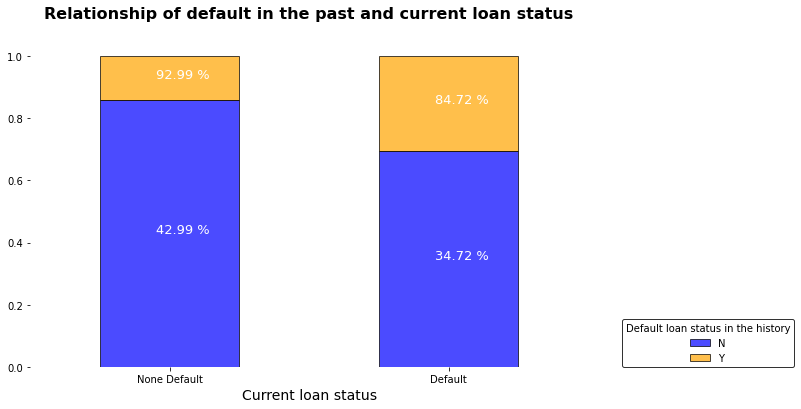

In [24]:
cross_pct.plot(kind='bar', stacked=True, color=['b', 'orange'],alpha=0.7, figsize=(10,6), edgecolor='k')
plt.xticks([0,1], labels=['None Default', 'Default'], rotation=0)
plt.box(False)
plt.legend(title='Default loan status in the history', loc=(1.06,0), edgecolor='k')
plt.title('Relationship of default in the past and current loan status', fontsize=16, fontweight='bold', y=1.05)
plt.xlabel('Current loan status', fontsize=14)
x = [-0.05, -0.05, 0.95, 0.95]
y = loc
labels = [str(round(i*100,2)) + ' %' for i in y]
for x,y,txt in list(zip(x,loc, labels)):
    plt.text(x,y,txt, fontsize=13, color='white')
plt.savefig('percentage.jpg')

**The graph indicates that the more percentage of failure to pay back a debt in the past the more probability of default in current contract.** 

## Statistics for exploring

### Chi-square test for define relationship between target and categorical variables

In [25]:
from scipy.stats import chi2_contingency, ttest_ind

In [27]:
list_va=[]
for i in non_target:
    conc = pd.crosstab(data[i], data['loan_status'])
     # Chi-square test of independence. 
    c, p, dof, expected = chi2_contingency(conc) 
    if p<0.05:
        list_va.append(i)
list_va

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

### T-Test for define relationship between target and numeric variables

In [28]:
for i in numbers:
    t,p = ttest_ind(data[i], data['loan_status'])
    if p<0.05:
        list_va.append(i)
list_va    

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'person_age',
 'person_income',
 'loan_amnt',
 'loan_percent_income',
 'cb_person_cred_hist_length']

### Check correlation between independent numernic variable

In [30]:
data.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


<AxesSubplot:>

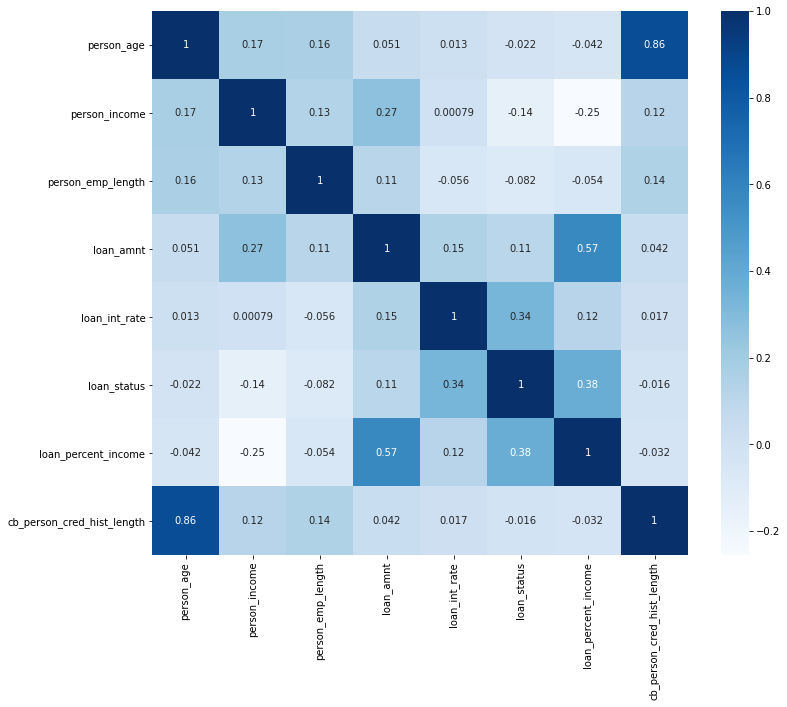

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True,cmap='Blues')

**Ttest and chi-square test includes all variables in list of independent variables using for prediction. However, in the correlation matrix, we can see the relationship of some input variables, for instance, person_age and cb_person_cred_hist_length with correlation coefficient 0.86 (strong positive degree), loan amount and loan percent income or cb_person_cred_hist_length with moderate positive degree of correlation. So it is crucial to perform feature importance before choose input variables for the prediction models. In the relationship with target variable, loan percent income and loan interest rate have moderate degree of correlation with correlation coefficient of 0.38 and 0.34, respectively** 